In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn import datasets
from models.pca.pca import PCA
import matplotlib.pyplot as plt

## Análise de Componentes Principais (PCA)

A Análise de Componentes Principais (PCA) é uma técnica de redução de dimensionalidade usada para encontrar uma representação compacta dos dados em um espaço de menor dimensão, preservando ao máximo a variância.

### Intuição
O PCA projeta os dados para um novo espaço definido pelos **componentes principais**, que são combinações lineares das variáveis originais. O objetivo é maximizar a variância projetada nos primeiros componentes.

### Fórmulas
1. **Cálculo da Matriz de Covariância**:
   \[
   \Sigma = \frac{1}{n} \sum_{i=1}^{n} (x_i - \mu)(x_i - \mu)^T
   \]

2. **Autovalores e Autovetores**:
   - Resolva \(\Sigma v = \lambda v\), onde:
     - \(v\): autovetor (direção do componente principal).
     - \(\lambda\): autovalor (quantidade de variância explicada).

3. **Transformação dos Dados**

### Importando dataset

In [6]:
df = pd.read_csv("../data/processed/penguins.csv", header=None)

### Tratando pontos flutuantes e valores incorretos

In [7]:
for col in df.columns:
    df[col] = df[col].astype(str).str.replace(",", ".")  # Substituir vírgulas por pontos
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [8]:
df = df.dropna()

### Separando X e y

In [9]:
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values

In [10]:
X.shape

(333, 4)

### Instanciando modelo

In [11]:
model = PCA(n_components=2)

In [12]:
model.fit(X)

In [13]:
model.components

array([[ 0.00400451, -0.00115473,  0.01519976,  0.99987579],
       [-0.31930569,  0.08684768, -0.94353281,  0.01572238]])

### Variância explicada de 1 a 4

In [14]:
for n in range(1, 5):
    model = PCA(n_components=n)
    model.fit(X)
    variance_ratio = model.explained_variance()
    print(f"Dimensão {n}: Variância explicada: {variance_ratio}")

Dimensão 1: Variância explicada: [0.99989318]
Dimensão 2: Variância explicada: [9.9989318e-01 7.8255314e-05]
Dimensão 3: Variância explicada: [9.99893180e-01 7.82553140e-05 2.49226495e-05]
Dimensão 4: Variância explicada: [9.99893180e-01 7.82553140e-05 2.49226495e-05 3.64217599e-06]


Variância explicada: [9.99893180e-01 7.82553140e-05 2.49226495e-05 3.64217599e-06]


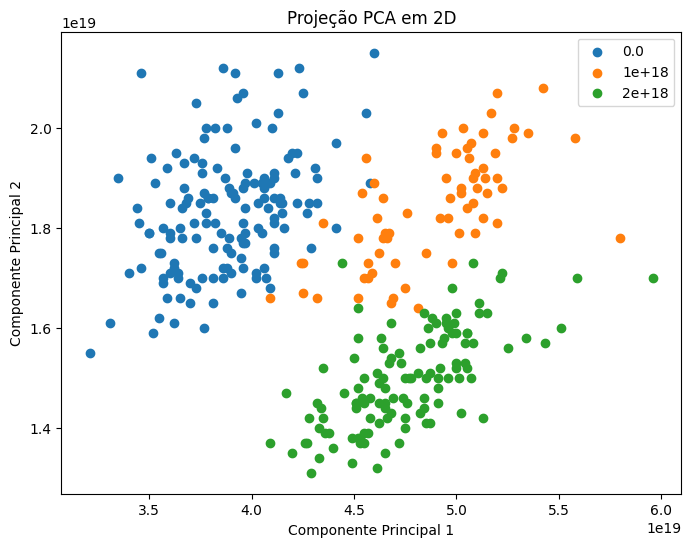

In [15]:
print("Variância explicada:", model.explained_variance())

plt.figure(figsize=(8, 6))
for species in np.unique(y):
    mask = (y == species)
    plt.scatter(X[mask, 0], X[mask, 1], label=species)
    
plt.title("Projeção PCA em 2D")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.show()